# Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from comp_phy import everythin as ev

In [3]:
def integrate(x):
    return np.exp(-(x**2))
def prob(x):
    return np.exp(-x)

In [8]:
u_sample = ev.monte_carlo(integrate,a=0,b=1,n=5000,imp=None)
imp_sample = ev.monte_carlo(integrate,prob,a=0,b=1,n=5000)

print(f"Integration value without importance sampling is {u_sample}, and with is {imp_sample}")

Integration value without importance sampling is 0.7471195821695069, and with is 0.7453002514806827


# Question 2

# Question 3

In [10]:
a = 1
b = 1

# 100 x 100 grid 
n = 100 
m = 100

In [11]:
dx = a/n
dy = b/m

In [12]:
den = 1/(2*(dx**2 + dy**2))

In [13]:
x = np.arange(0,a,dx)
y = np.arange(0,b,dy)

In [23]:
phi = np.zeros((n,m))
phi[0,:] = 0
phi[n-1,:] = 0
phi[:,0] = 1
phi[:,m-1] = 0

In [22]:
phi[m-1][1]

1.0

In [31]:
def FTD(phi,dx,dy,n,m):
    for i in range(1,n-1):
        for j in range(1,m-1):
            phi[i][j] = den * ((phi[i+1][j] + phi[i-1][j])*dx**2 + (phi[i][j+1] + phi[i][j-1])*dy**2)
    phi[0][0] = (phi[1][0] + phi[0][1])/2
    phi[0][m-1] = (phi[0][m-2] + phi[1][m-1])/2
    phi[n-1][m-1] = (phi[n-2][m-1] + phi[n-1][m-2])/2
    phi[n-1][0] = (phi[n-2][0] + phi[n-1][1])/2
    
    return phi


In [29]:
iter = 500

In [33]:
for i in range(iter):
    phi = FTD(phi,dx,dy,n,m)
    
print(phi)

[[5.00000000e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 4.99828098e-01 3.02003682e-01 ... 1.25200244e-04
  6.25442891e-05 0.00000000e+00]
 [1.00000000e+00 6.97308979e-01 4.99312931e-01 ... 2.50350919e-04
  1.25063866e-04 0.00000000e+00]
 ...
 [1.00000000e+00 6.97314901e-01 4.99324758e-01 ... 2.58113854e-04
  1.28944852e-04 0.00000000e+00]
 [1.00000000e+00 4.99831125e-01 3.02009729e-01 ... 1.29169175e-04
  6.45285066e-05 0.00000000e+00]
 [5.00000000e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


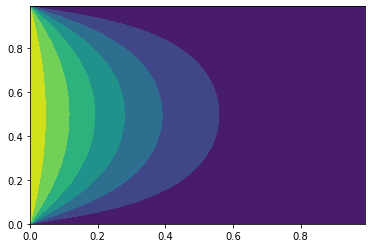

In [34]:
plt.contourf(x,y,phi)